In [18]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf

In [20]:
import tqdm 

DATADIR = 'C:/Users/Balint/Documents/VGG13/train'
CATEGORIES = ['angry', 'disgust' , 'fear', 'happy', 'neutral', 'sad']
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 to 9)

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            
            try:
                image = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
                training_data.append([image, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

5


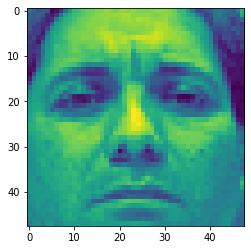

In [21]:
plt.imshow(training_data[24000][0])
print(training_data[24000][1])

In [22]:
X = []
y = []
for feature, labels in training_data:
    X.append(feature)
    y.append(labels)

X = np.array(X).reshape(-1, 48, 48, 1)
y = np.array(y)


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout

# Define the VGG-13 architecture using TensorFlow Keras
def VGG13(input_shape=(48, 48, 1), num_classes=6):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Classification block
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the model
vgg13_model = VGG13(input_shape=(48, 48, 1), num_classes=6)

# Compile the model
vgg13_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Display the model architecture
epochs = 10 
batch_size = 86

history = vgg13_model.fit(X, y, batch_size = batch_size, epochs = epochs, validation_split=0.2, verbose = 2)

Epoch 1/10


KeyboardInterrupt: 